### MA3402 Estadística
## Tarea 1, Entrega 2: Conociendo los Modelos Estadísticos.

**Profesor:** Joaquín Fontbona T.

**Auxiliares:** Javier Maass, Francisco Muñoz y Diego Olguín.

**Integrantes:** Gaspar Herreros y Tomás Ramírez.

## Antes de comenzar
Si aún no lo han hecho, miren la playlist de _Introducción a R para estadística_ que hemos dejado disponible en UCursos (https://www.youtube.com/playlist?list=PLcnkc7YRWgxbB_SIm3efkoRIRyxP0N-IK).

Por otro lado, recuerden hacer la entrega 1 ! Esta les ayudará a familiarizarse con las herramientas de R y es una muy buena base para lo que tendrán que hacer aquí !


# Estimando Parámetros

### Una situación (relativamente) real

Uno de los fenómenos que tradicionalmente podemos modelar usando modelos probabilísticos (más específicamente, las llamadas _cadenas de Markov_) son los problemas de _colas_.

Por ejemplo, imaginemos que a un call center llegan llamadas a una _tasa_ $\lambda$ (algo así como que llegan aleatoriamente $\lambda$ llamadas por segundo). Este call center es muy tecnológico, y usando modelos de NLP (como GPT4) y de _text-to-speech_, puede atender autónomamente a (prácticamente) **infinitos** clientes a la vez. En particular, a cada llamada que llega, siempre se le puede asignar un _robot_ que esté libre para atenderlo). Digamos que cada robot es capaz de resolver la llamada a una tasa $\mu$. Como todas están en paralelo, en la práctica, si tengo $k$ llamadas activas, estas _decaen_ a tasa $k\mu$ (i.e. la _velocidad_ a la que decae globalmente el número de llamadas depende de la cantidad de llamadas activas y de la tasa de decaimiento de cada una individualmente).

Este fenómeno se modela con lo que llamamos una _cadena de Markov a tiempo continuo_ (más detalles en su próximo curso). Si quieren un bonito video "introductorio" a este tipo de ideas, les recomiendo el siguiente: https://www.youtube.com/watch?v=rBIQmwaoZfs&ab_channel=Mathemaniac (aunque el problema es ligeramente distinto al que trabajamos aquí; en este caso, estamos lidiando con lo que se conoce como una cola M/M/$\infty$).

Muy bonito el modelo y todo, pero en la práctica el gerente del call center va querer saber cómo se ven _en promedio_ la cantidad de líneas que se están ocupando (en base a eso, podrá estimar cuánto le va a costar la mantención del servicio, cuánto más rápida debe ser la IA, etc,etc).

Lo bueno del modelo, es que se puede calcular (lo harán en el curso de Markov) que _en el equilibrio_ (o _a largo plazo_ o _en promedio_) la cantidad de líneas que se están usando en el servicio sigue una distribución de **Poisson**. Más precisamente, si $X$ es la v.a. que modela la cantidad de líneas en uso _en el equilibrio_ (y que, por lo mismo, toma valores en $\mathbb{N}$), entonces, se sabe que $X \sim \mathrm{Poisson}(\frac{\lambda}{\mu})$ (donde $\lambda$ era la tasa a la que _llegan las llamadas_ y $\mu$ era la _velocidad_ con la cual la IA era capaz de resolverlas).

Genial! Porque ese tipo de variables las conocemos, y podemos empezar a calcular cosillas con ellas...

### Calculemos cosillas (viejas)

**TLDR:** queremos entender $X \sim \mathrm{Poisson}(\frac{\lambda}{\mu})$ la cantidad de llamadas activas que hay _en equilibrio_ en el call center (donde $\lambda$ era la tasa a la que _llegan las llamadas_ y $\mu$ era la _velocidad_ con la cual la IA era capaz de resolverlas). En la práctica, esto lo haremos con _observaciones_ i.i.d. de la cantidad de llamadas activas en el call center.

Comencemos simulando una muestra i.i.d. de $n$ realizaciones de una v.a. $\texttt{poisson} \sim \mathrm{Poisson}(\nu)$, con $\nu >0$ (donde aquí, $\nu = \frac{\lambda}{\mu}$).

**1.-** Antes de empezar a simular, calcule la cantidad _promedio_ de líneas que estarán ocupadas en el _equilibrio_ bajo este modelo. Proponga un estimador para esta cantidad y diga si es insesgado (o no) y si es consistente (o no). Repita el procedimiento para algún estimador de la _varianza_ de la cantidad de líneas ocupadas en _equilibrio_.

**Respuesta:**

Sabemos que en el equilibrio, la cantidad de llamadas activas que hay en el call center sigue una distribución de **Poisson**. Más precisamente, si llamamos $X$ a la v.a que modela la cantidad de líneas en uso en el equilibrio, entonces $X\sim\mathrm{Poisson}(\frac{\lambda}{\mu})$. De esta manera, si queremos calcular la cantidad promedio de líneas que estarán ocupadas en el equilibrio, simplemente tenemos que calcular la esperanza de nuestra variable aleatoria $X$, la cual sabemos que viene dada por $\mathbb{E}[X]=\frac{\lambda}{\mu}=\nu$.

Un estimador para esta cantidad podría ser $\hat{\nu}=\frac{1}{n}\cdot\sum_{i=1}^nX_i$. Para ver si es insesgado o no tenemos que calcular la esperanza de este estimador. Notemos que:

$$\begin{aligned}\mathbb{E}[\hat{\nu}]&=\mathbb{E}[\frac{1}{n}\cdot\sum_{i=1}^nX_i]\\&=\frac{1}{n}\cdot\sum_{i=1}^n\mathbb{E}[X_i]\\&=\frac{1}{n}\cdot\sum_{i=1}^n\nu\\&=\frac{1}{n}\cdot n\nu\\&=\nu\end{aligned}$$
Luego, como $\mathbb{E}[\hat{\nu}]=\mathbb{E}[X]=\nu$, entonces el estimador propuesto es insesgado.
Ahora, para ver si nuestro estimador es consistente, tenemos que ver si $\mathrm{Var}(\hat{\nu})\to0$ cuando $n\to\infty$. Notemos que:

$$\begin{aligned}\mathrm{Var}(\hat{\nu})&=\mathrm{Var}(\frac{1}{n}\cdot\sum_{i=1}^nX_i)\\&=\frac{1}{n^2}\sum_{i=1}^n\mathrm{Var}(X_i)\\&=\frac{1}{n^2}\sum_{i=1}^n\nu\\&=\frac{1}{n^2}\cdot n\cdot\nu\\&=\frac{\nu}{n}\underset{n\to\infty}{\longrightarrow}0\end{aligned}$$
Luego, como $\mathrm{Var}(\hat{\nu})\to0$ cuando $n\to\infty$ y $\mathbb{E}[\hat{\nu}]=\mathbb{E}[X]$, entonces el estimador propuesto es consistente.

Por otro lado, para el estimador de la varianza, podemos usar $\hat{\nu_1}=\frac{1}{n-1}\cdot\sum_{i=1}^n(X_i - \overline{X})^2$, donde $\overline{X}$ es el promedio empírico de las v.a $X_i$. Es decir, $\overline{X}=\frac{1}{n}\sum_{i=1}^nX_i$. Al igual que el estimador de la esperanza, para ver si es o no insesgado tenemos que calcular la esperanza de este estimador. Notemos que:

$$\begin{aligned}\mathbb{E}[\hat{\nu}_1]&=\mathbb{E}\left[\frac{1}{n-1}\cdot\sum_{i=1}^n(X_i - \overline{X})^2\right]\\&=\mathbb{E}\left[\frac{1}{n-1}\cdot\sum_{i=1}^nX_i^2-2X_i\overline{X}+\overline{X}^2\right]\\&=\mathbb{E}\left[\frac{1}{n-1}\cdot\left(\sum_{i=1}^nX_i^2-\sum_{i=1}^n2X_i\overline{X}+\sum_{i=1}^n\overline{X}^2\right)\right]\\&=\mathbb{E}\left[\frac{1}{n-1}\cdot\left(\sum_{i=1}^nX_i^2-n\cdot\frac{1}{n}\sum_{i=1}^n2X_i\overline{X}+\sum_{i=1}^n\overline{X}^2\right)\right]\\&=\mathbb{E}\left[\frac{1}{n-1}\cdot\left(\sum_{i=1}^n(X_i^2)-2n\overline{X}^2+n\overline{X}^2\right)\right]\\&=\mathbb{E}\left[\frac{1}{n-1}\cdot\left(\sum_{i=1}^n(X_i^2)-n\overline{X}^2\right)\right]\\&=\frac{1}{n-1}\cdot\left(\sum_{i=1}^n(\mathbb{E}[X_i^2])-n\mathbb{E}[\overline{X}^2]\right)\end{aligned}$$

Además, notemos que por la caracterización de la varianza de una variable aleatoria por medio de la esperanza, tenemos que:

$\mathrm{Var}(X)=\mathbb{E}[X^2]-\mathbb{E}[X]^2\Longrightarrow \mathbb{E}[X^2]=\mathrm{Var}(X)+\mathbb{E}[X]^2$.

Luego, como $\mathbb{E}[X_i]=\mathrm{Var}(X_i)=\nu$, $\forall i \in [n]$, tenemos que $\mathbb{E}[X_i^2]=\nu+\nu^2$, $\forall i\in[n]$. Además, como calculamos anetriormente, $\mathbb{E}[\overline{X}]=\nu$ y $\mathrm{Var}(\overline{X})=\frac{\nu}{n}$, por lo cual $\mathbb{E}[\overline{X}^2]=\nu^2+\frac{\nu}{n}$. De esta manera, obtenemos que:

$$\begin{aligned}\frac{1}{n-1}\cdot\left(\sum_{i=1}^n(\mathbb{E}[X_i^2])-n\mathbb{E}[\overline{X}^2]\right)&=\frac{1}{n-1}\left(\sum_{i=1}^n(\nu+\nu^2)-n\cdot\left(\nu^2+\frac{\nu}{n}\right)\right)\\&=\frac{1}{n-1}\left(n\cdot\nu+n\cdot\nu^2-n\cdot\nu^2-\nu\right)\\&=\frac{1}{n-1}(\nu\cdot(n-1))\\&=\nu\\&=\mathrm{Var}(X)\end{aligned}$$

Así, como $\mathbb{E}[\hat{\nu}_1]=\mathrm{Var}(X)=\nu$, entonces $\hat{\nu}_1$ es insesgado. A continuación, para determinar si el estimador es o no consistente, primero comencemos notando que nuestro estimador $\hat{\nu_1}$ puede ser escrito como:

$$\begin{aligned}\hat{\nu_1}&=\frac{1}{n-1}\cdot\left(\sum_{i=1}^n(X_i^2)-n\overline{X}^2\right)\\&=\frac{n}{n-1}\cdot\left(\frac{1}{n}\sum_{i=1}^n(X_i^2)-\overline{X}^2\right)\end{aligned}$$

Además, notemos que por la LGN (fuerte), se tiene que:

$$\frac{1}{n}\sum_{i=1}^n(X_i)^2\overset{c.s}{\underset{n\to\infty}{\longrightarrow}}\mathbb{E}[X_i^2]=\nu+\nu^2$$

Donde $\mathbb{E}[X_i^2]=\nu+\nu^2$ por resultado anterior. Además, también por la LGN (fuerte), obtenemos que:

$$-(\overline{X})^2\overset{c.s}{\underset{n\to\infty}{\longrightarrow}}-\mathbb{E}[X_i]^2=-\nu^2$$

Finalmente, es claro que $\frac{n}{n-1}\to 1$ cuando $n\to\infty$. De esta manera, jutando las tres cosas, se tiene que nuestro estimador $\hat{\nu_1}$ cumple que, por la LGN fuerte:

$$\hat{\nu_1}=\frac{n}{n-1}\cdot\left(\frac{1}{n}\sum_{i=1}^n(X_i^2)-\overline{X}^2\right)\overset{c.s}{\underset{n\to\infty}{\longrightarrow}}1\cdot(\nu+\nu^2-\nu^2)=\nu\Longrightarrow\hat{\nu_1}\overset{\mathbb{P}}{\underset{n\to\infty}{\longrightarrow}}\nu=\mathrm{Var}(X)$$

O sea, como nuestro estimador $\hat{\nu_1}$ converge en probabilidad al parámetro a estimar, entonces $\hat{\nu_1}$ es consistente.


**2.-** ¿Será capaz el gerente de identificar individualmente cada parámetro $\lambda$ y $\mu$ del modelo de colas? Busque el concepto de _identificabilidad_ de un modelo estadístico y explique (muy brevemente) cómo se aplica aquí.

**Respuesta:** 

No, el gerente no será capaz de identificar individualmente cada parámetro $\lambda$ y $\mu$ del modelo de colas, pues solamente puede conocer $\nu=\frac{\lambda}{\mu}$, es decir, la relación que existe entre $\lambda$ y $\mu$, mas no cada uno por separado. Esto debido a que usando distintos estimadores insesgados solo puede obtener la esperanza de la v.a, la cual vendría a ser $\nu$, pero no cada parámetro por si solo.
Esto puede ser explicado por el concepto de identificabilidad de un modelo estadístico, el cual dice que un modelo estadístico es identificable si la función:
$$\begin{aligned}\varphi:&\Theta\to\mathcal{P}(X)\\&\theta\mapsto P_{\theta}\end{aligned}$$
es inyectiva. Notemos que este no es el caso, pues si consideramos $\Theta=\mathbb{R}_+ \times \mathbb{R}_+$, $\theta=(\lambda,\mu)$, $X=\mathbb{N}$, y $P_{\theta}=\mathrm{Poisson}(\frac{\lambda}{\mu})$, y si consideramos $\theta_1 = (\lambda,\mu)$ y $\theta_2=(2\lambda,2\mu)$, tenemos que claramente como $\lambda,\mu\in\mathbb{R}_+$, entonces $\theta_1\neq\theta_2$, pero sin embargo, se cumple que:
$$\begin{aligned}\varphi(\theta_1)&=P_{\theta_1}\\&=\mathrm{Poisson}(\frac{\lambda}{\mu})\\&=\mathrm{Poisson}(\frac{2\lambda}{2\mu})\\&=P_{\theta_2}\\&=\varphi(\theta_2)\end{aligned}$$
Por lo tanto, como $\exists\theta_1,\theta_2\in\Theta:\theta_1\neq\theta_2\wedge\varphi(\theta_1)=\varphi(\theta_2)$, entonces $\varphi$ no es inyectiva, y por ende, el modelo estadístico no es identificable, lo cual quiere decir que no podemos determinar $\lambda$ y $\mu$ por separado, si no solamente el resultado de su cociente.


**3.-** Digamos que las llamadas llegan a una velocidad de $\lambda = 4$, y que la IA es capaz de responderlas a una tasa $\mu = 2$. Genera una muestra de $n = 10000$ v.a.s $\texttt{poisson}$ con estos parámetros. Guárdala en un dataframe $\texttt{df}$.

In [ ]:
# Definimos n, lambda, mu y nu
n<-10000
lamb<-4
mu<-2
nu<-lamb/mu

# Generamos la muestra de v.a.s poisson
pois<-rpois(n,lambda=nu)

# Guardamos todo en un dataframe
df<-data.frame(pois)

**4.-** Ploteen un histograma de su muestra.

In [ ]:
# Instalémos ggplot2 en caso de que no la tengamos
if(!(require(ggplot2))){install.packages('ggplot2')}
library(ggplot2) 


Loading required package: ggplot2



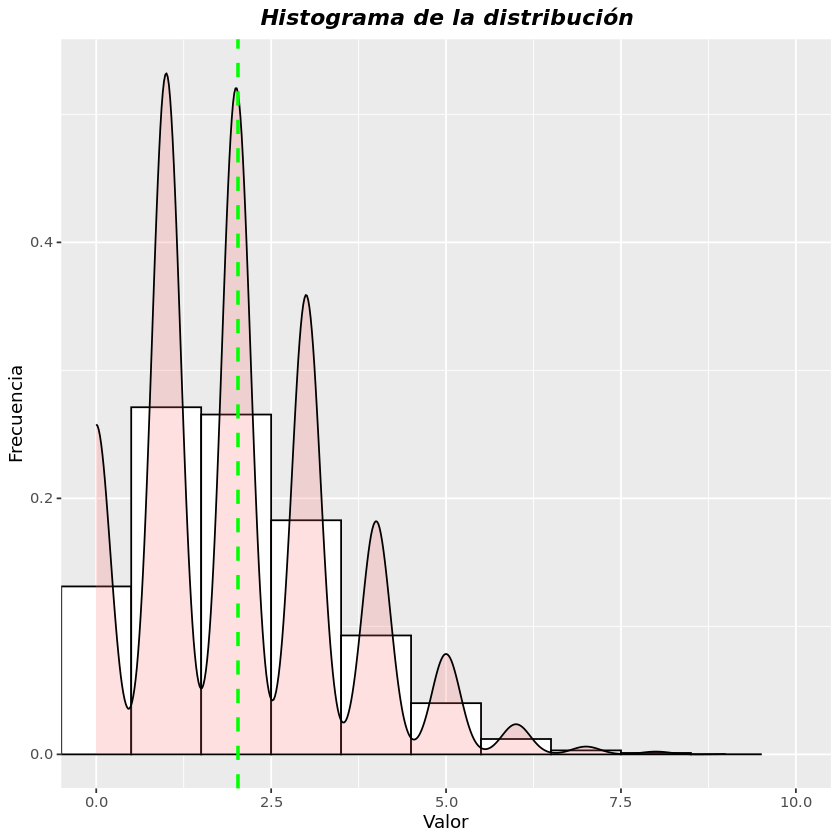

In [ ]:
# Importamos la función de la entrega parcial anterior
my.hist <- function(df, col, binwidth=0.1, xmin=-4, xmax=4){
    p <- ggplot(df, aes(x=!! sym(col))) + 
    geom_histogram(aes(y=after_stat(density)), colour="black", fill="white", binwidth = binwidth) +
    geom_density(alpha=.2, fill="#FF6666") + 
    geom_vline(aes(xintercept=mean(!!sym(col))), color="green", linetype="dashed", linewidth=1) + 
    labs(
        title='Histograma de la distribución',
        x = "Valor",
        y = "Frecuencia"
    ) + 
    theme(plot.title = element_text(h=0.5, face = "bold.italic")) + 
    coord_cartesian(xlim = c(xmin, xmax))
    return(p);
}

# Generamos el histograma
p<-my.hist(df,"pois",binwidth=1,xmin=0,xmax=10)
p

**5-** Considere su estimador para el _promedio_ de llamadas que hay _en el equilibrio_: calcúlelo y grafique si converge (o no) al valor real de dicho promedio cuando aumenta el número de muestras. Compare esto con su estimador de la _varianza_. ¿Cuál sería preferible para estimar el parámetro $\nu$ subyacente a la distribución?

_Hint: Recuerde cómo ploteamos la convergencia de los promedios empíricos en la sección de la LGN. Les recomendamos agregar lo que les parezca conveniente a su gráfico, para que se observe de forma más o menos clara qué estimador está convergiendo mejor que el otro (e.g. líneas horizontales marcando cierto nivel de "error", etc.). No es obligatorio, pero les ayudará a explicar mejor sus resultados !_.

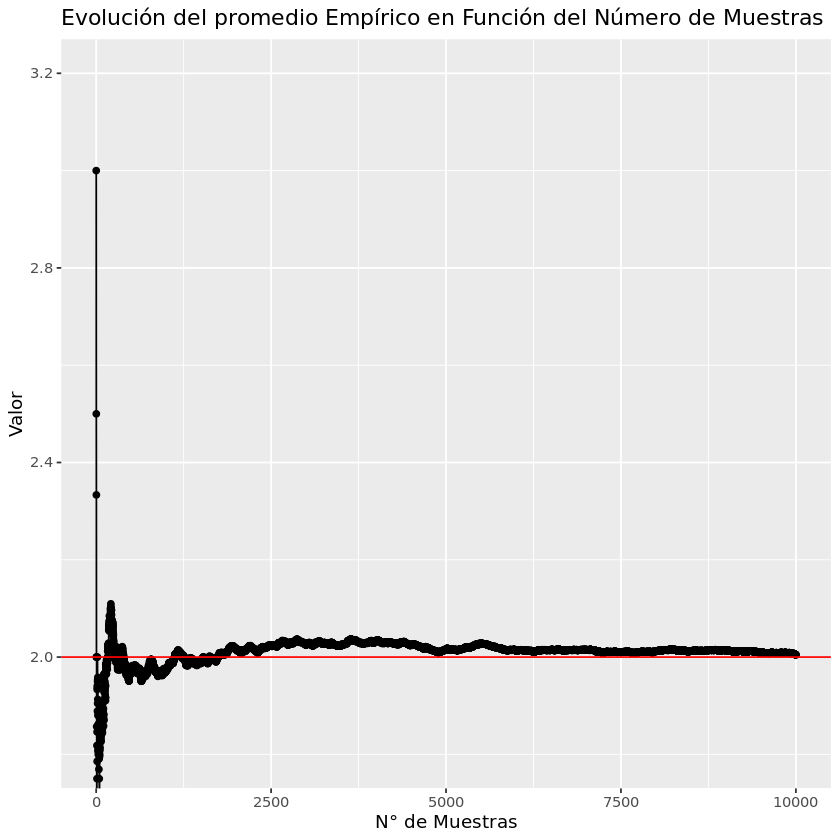

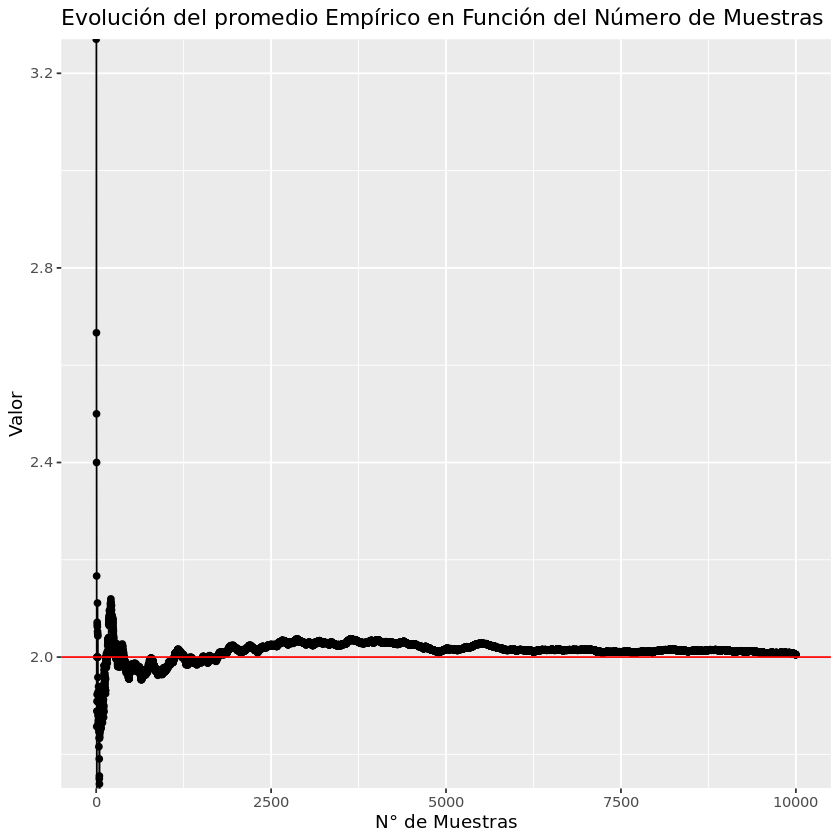

In [ ]:
# Definimos las n variables aleatorias Poisson
poisson<-rpois(n,lambda=nu)

# Definimos el estimador para la esperanza
prom<-numeric(length=n)
for(i in 1:n) {
    prom[i]<-sum(poisson[1:i])/i
}

# Lo guardamos en un data frame
dfprom<-data.frame(prom)

# Definimos el estimador para la varianza
var<-numeric(length=n)
for(i in 1:n) {
    var[i]<-sum(poisson[1:i])/(i-1)
}

# Lo guardamos en un data frame
dfvar<-data.frame(var)

# Importamos la función para plotear
my.cvg <- function(df, col, prom=0, ymin=0, ymax=1){
    pp <- ggplot(data=df, aes(x= as.numeric(row.names(df)), y=!!sym(col))) +
    geom_line() +
    geom_point() + 
    labs(
        title='Evolución del promedio Empírico en Función del Número de Muestras',
        x = "N° de Muestras",
        y = "Valor"
    ) +
    geom_hline(yintercept=prom, color="red") + 
    coord_cartesian(ylim = c(ymin, ymax))
    return(pp);
}

# Ploteamos el estimador para la esperanza
my.cvg(dfprom,"prom",prom=2,ymin=1.8,ymax=3.2)

# Ploteamos el estimador para la varianza
my.cvg(dfvar,"var",prom=2,ymin=1.8,ymax=3.2)

___
**Q: ¿Cuál sería preferible para estimar el parámetro $\nu$ subyacente a la distribución?**

**R:** En la práctica los 2 estimadores estiman de muy buena manera el parámetro $\nu$ al cual nos queremos aproximar. Las diferencias entre ambos estimadores son mínimas y no tienen gran relevancia al momento de elegir uno u el otro. Ambos parecen converger a $\nu=2$ cuano $n$ es lo suficientemente grande, por lo que no se puede decir que un estimador es mejor. Además, la rapidez con la que convergen estos estimadores parece ser casi la misma. No se ve una clara diferencia en cuál estimador "llega antes" a estabilizarse en el $2$. En síntesis, ambos estimadores son igual de buenos para determinar el parámetro $\nu$ subyacente a la distribución.
___


### Calculemos cosillas (nuevas)

Al gerente del call center le interesaría calcular la probabilidad de que _en equilibrio_ hayan exactamente $0$ llamadas activas (esto le permitirá estimar qué fracción del tiempo podrá _ahorrarse el costo de usar AWS para correr la IA_). Denotémosla como: $g(\nu) = \mathbb{P}(\texttt{poisson}=0)$.

**6.-** Calcule el valor de $g(\nu)$ para cualquier $\nu >0$.

**Respuesta:**

Sabemos que una variable aleatoria $X\sim\mathrm{Poisson(\lambda)}$ cumple con que $\mathbb{P}(X=k)=\frac{e^{-\lambda}\cdot\lambda^k}{k!}$. En particular, como nos interesa calcular $g(\nu)=\mathbb{P}(X=0)$ con $X\sim\mathrm{Poisson}(\nu)$, esto simplemente es:

$$\begin{aligned}g(\nu)&=\mathbb{P}(X=0)\\&=\frac{e^{-\nu}\cdot\nu^0}{0!}\\&=\frac{e^{-\nu}\cdot 1}{1}\\&=e^{-\nu}\end{aligned}$$
$\therefore g(\nu)=e^{-\nu}$, $\forall\nu>0$.


**7.-** Buscaremos estimar el valor de $g(\nu)$ a través de los siguientes _estimadores_:

- $\hat{g}_1 = e^{- \overline{\texttt{poisson}}_n}$ (exponencial de -_el promedio_)
- $\hat{g}_2 = \frac{1}{n} \sum_{i=1}^n 1_{\{\texttt{poisson}_i = 0\}}$ (promedio de la _indicatriz_ de cuándo la v.a. fue 0).
- $\hat{g}_3 = (1-\frac{1}{n})^{n \cdot\overline{\texttt{poisson}}_n}$ (algo así como la aproximación de la exponencial que queremos).

Determine cuáles de estos son (o no) insesgados. Decida si es posible transformar aquellos que son sesgados en insesgados de alguna forma. 

**Respuesta:**
Para determinar cuáles de estos estimadores son insesgados, tenemos que calcular la esperanza de cada uno de ellos. Veamos primero $\hat{g_1}$. Se tiene que:

$$\begin{aligned}\mathbb{E}_\theta[\hat{g_1}]&=\mathbb{E}_\theta\left[e^{- \overline{\texttt{poisson}}_n}\right]\\&=\mathbb{E}\left[e^{-\frac{1}{n}\sum_{i=1}^nX_i}\right]\\&=\mathbb{E}\left[\prod_{i=1}^ne^{-\frac{1}{n}X_i}\right]\\&=\prod_{i=1}^n\mathbb{E}[e^{-\frac{1}{n}X_i}]\\&=\prod_{i=1}^n\sum_{x=0}^\infty\frac{e^{-\frac{1}{n}\cdot x}\cdot e^{-\nu}\cdot\nu^x}{x!}\\&=e^{-n\cdot\nu}\cdot\prod_{i=1}^n\sum_{x=0}^\infty\frac{(e^{-\frac{1}{n}}\cdot\nu)^x}{x!}\\&=e^{-n\cdot\nu}\cdot\prod_{i=1}^n e^{\frac{\nu}{e^n}}\\&=e^{-n\cdot\nu}\cdot e^{\frac{n\cdot\nu}{e^n}}\\&=\mathrm{exp}\left(-n\cdot\nu+\frac{n\cdot\nu}{e^n}\right)\\&=\mathrm{exp}\left(\frac{(-\nu)\cdot n\cdot(e^n-1)}{e^n}\right)\\&=(e^{-\nu})^{n(e^n-1)/e^n}\\&\neq e^{-\nu}\end{aligned}$$

$\therefore$ Como $\mathbb{E}(\hat{g_1})\neq e^{-\nu}=g(\nu)$, entonces el estimador $\hat{g_1}$ no es insesgado.

Luego, para $\hat{g_2}$, se obtiene que:

$$\begin{aligned}\mathbb{E}_\theta[\hat{g_2}]&=\mathbb{E}_\theta\left[\frac{1}{n} \sum_{i=1}^n 1_{\{\texttt{poisson}_i = 0\}}\right]\\&=\frac{1}{n}\sum_{i=1}^n\mathbb{E}_\theta[1_{\{\texttt{poisson}_i = 0\}}]\end{aligned}$$

Notemos que $\mathbb{P}(1_{\{\texttt{poisson}_i = 0\}}=1)=\mathbb{P}(\texttt{poisson}_i=0)=g(\nu)$ (por enunciado), y además se tiene que $\mathbb{P}(1_{\{\texttt{poisson}_i = 0\}}=0)=\mathbb{P}(\texttt{poisson}_i\neq0)=1-g(\nu)$. De esta manera, obtenemos que:

$$\begin{aligned}\frac{1}{n}\sum_{i=1}^n\mathbb{E}_\theta[1_{\{\texttt{poisson}_i = 0\}}]&=\frac{1}{n}\sum_{i=1}^n0\cdot\mathbb{P}(1_{\{\texttt{poisson}_i = 0\}}=0)+1\cdot\mathbb{P}(1_{\{\texttt{poisson}_i = 0\}}=1)\\&=\frac{1}{n}\sum_{i=1}^ng(\nu)\\&=g(\nu)\end{aligned}$$

Así, como $\mathbb{E}_\theta[\hat{g_2}]=g(\nu)$, entonces $\hat{g_2}$ es insesgado.

Finalmente, para $\hat{g_3}$, se tiene que:

$\begin{aligned}\mathbb{E}_\theta[\hat{g_3}]&=\mathbb{E}\left[\left(1-\frac{1}{n}\right)^{\sum_{i=1}^nX_i}\right]\\&=\mathbb{E}\left[\prod_{i=1}^n\left(1-\frac{1}{n}\right)^{X_i}\right]\\&=\prod_{i=1}^n\mathbb{E}\left[\left(1-\frac{1}{n}\right)^{X_i}\right]\\&=\prod_{i=1}^n\sum_{x=0}^\infty\frac{\left(1-\frac{1}{n}\right)^x\cdot e^{-\nu}\cdot\nu^x}{x!}\\&=e^{-n\cdot\nu}\prod_{i=1}^n\sum_{x=0}^\infty\frac{\left(1-\frac{1}{n}\right)^x\cdot\nu^x}{x!}\\&=e^{-n\cdot\nu}\prod_{i=1}^ne^{\frac{\nu(n-1)}{n}}\\&=e^{-n\cdot\nu}\cdot e^{\nu(n-1)}\\&=e^{-\nu}\\&=g(\nu)\end{aligned}$

De esta manera, como $\mathbb{E}_\theta[\hat{g_3}]=g(\nu)$, entonces $\hat{g_3}$ es un estimador insesgado.

Cabe destacar que no es posible convertir el estimador $\hat{g_2}$ en un estimador insesgado, puesto que para hacer esto tendríamos que multiplicar el estimador por algo que depende de $\nu$, específicamente por:

$$\exp(-(e^{-n}-1)n\nu-\nu)$$

Esto pues queremos que la esperanza de nuestro estimador sea $e^{-\nu}$. Sin embargo, no podemos multiplicar nuestro estimador por algo que dependa de $\nu$, pues lo que queremos estimar es cuánto vale algo que depende de este parámetro. De esta manera, es imposible convertir el único estimador sesgado en uno insesgado.

**8.-** Simule cada uno de estos estimadores en base a las muestras de $\texttt{poisson}$ que ya tiene a mano. Grafique su evolución según el número de muestras. ¿Son consistentes los estimadores? ¿Qué tan relevante es el hecho que sean _insesgados_?

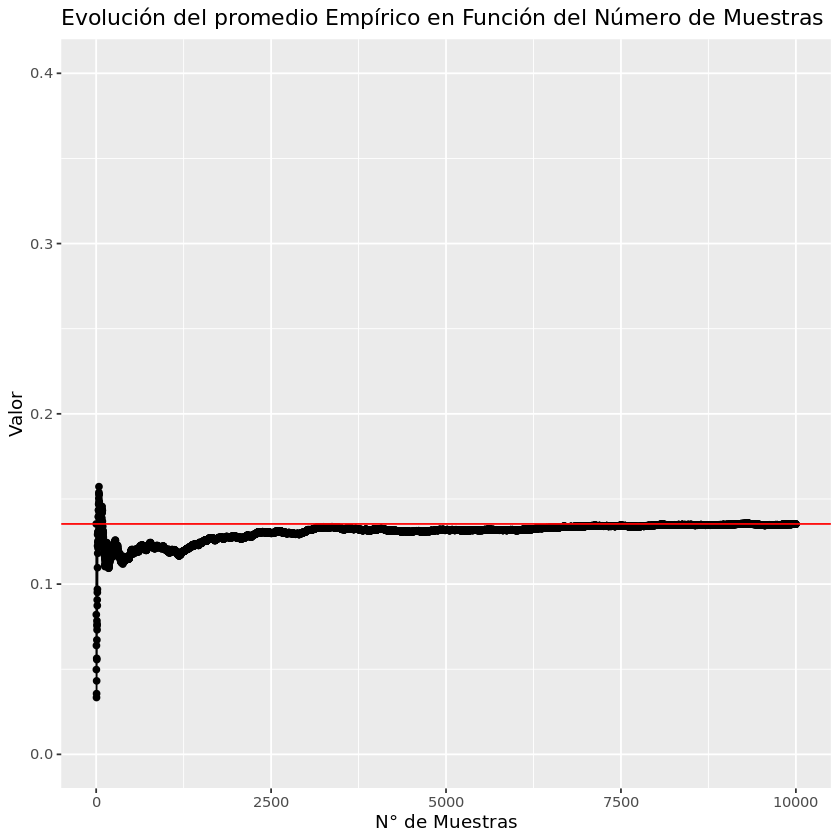

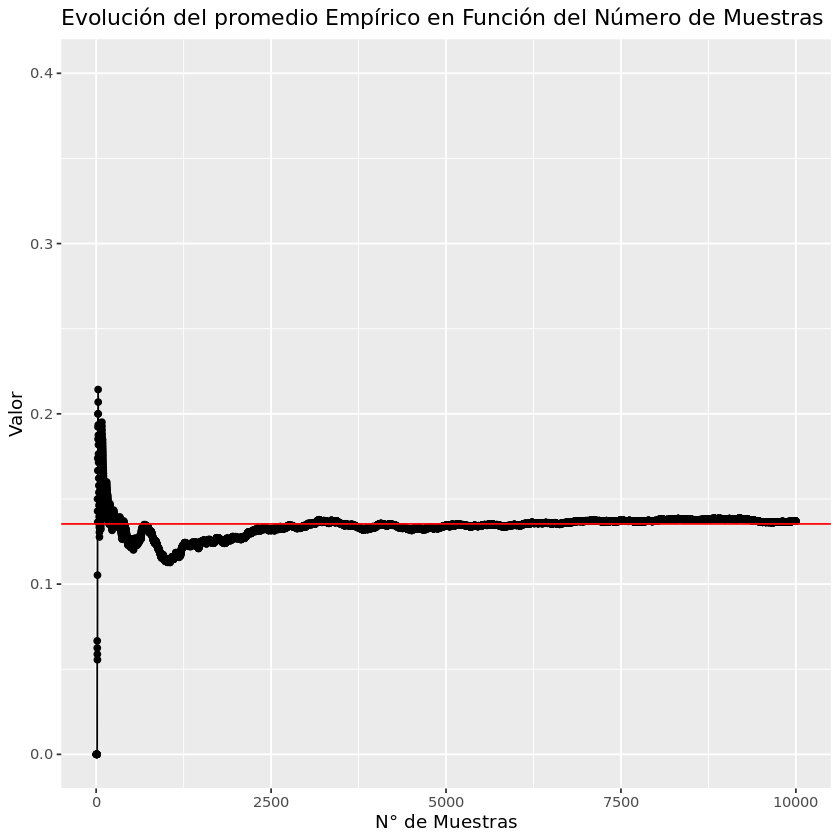

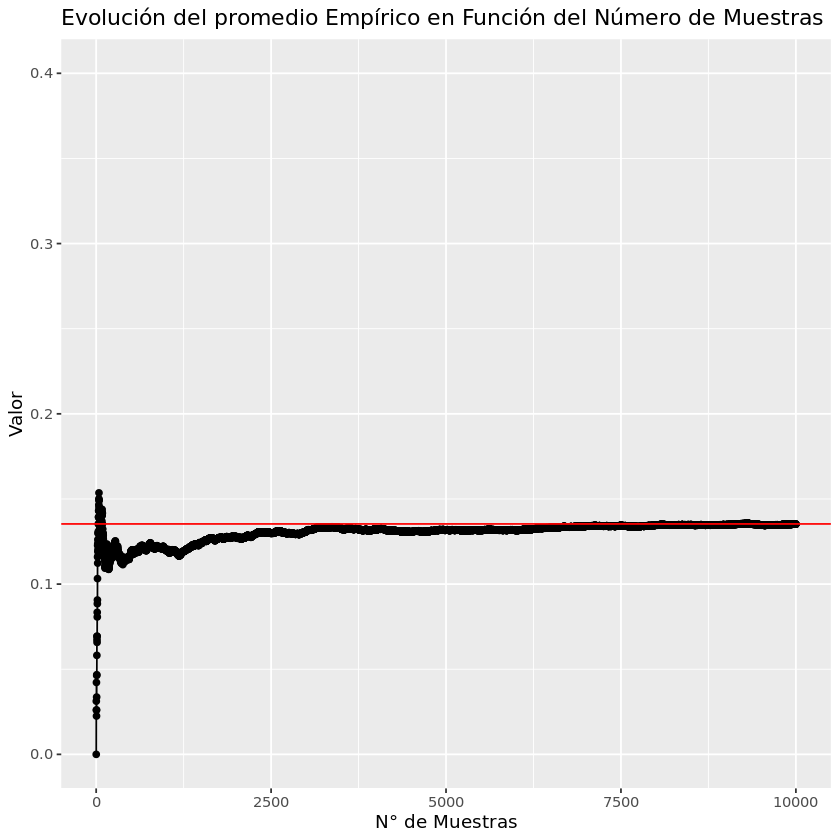

In [ ]:
# Definimos las n variables aleatorias Poisson
poisson<-rpois(n, lambda = nu)

# Definimos el estimador g1
g1<-numeric(length=n)
for(i in 1:n) {
    g1[i]<-exp(-sum(poisson[1:i])/i)
}

# Lo guardamos en un data frame
dfg1<-data.frame(g1)


# Definimos el estimador g2
poisson2<-poisson
for(i in 1:n) {
    if(poisson2[i]==0){
        poisson2[i]=1
    }else{
        poisson2[i]=0
    }
}

g2<-numeric(length=n)
for(i in 1:n) {
    g2[i]<-(1/i)*sum(poisson2[1:i])
}

# Lo guardamos en un data frame
dfg2<-data.frame(g2)

# Definimos el estimador g3
g3<-numeric(length=n)
for(i in 1:n) {
    g3[i]<-(1-1/i)^(sum(poisson[1:i]))
}

# Lo guardamos en un data frame
dfg3<-data.frame(g3)

# Ploteamos g1
my.cvg(dfg1,"g1",ymax=0.4, prom=exp(-nu))

# Ploteamos g2
my.cvg(dfg2,"g2",ymax=0.4, prom=exp(-nu))

# Ploteamos g3
my.cvg(dfg3,"g3",ymax=0.4, prom=exp(-nu))

___
**Q: ¿Son consistentes los estimadores?**

**R:** Si, los 3 estimadores parecen ser consistentes, pues todos se aproximan al parámetro que se quiere estimar cuando $n$ es suficientemente grande.

**Q: ¿Qué tan relevante es el hecho que sean _insesgados_?**

**R:** El único estimador que no es insesgado es $\hat{g_1}$, y no parece que sea algo tan terrible, pues, al igual que los otros dos estimadores que son insesgados, el estimador $\hat{g_1}$ estima de muy buena manera el parámetro $g(\nu)$ que se quiere determinar. La velocidad con la cual los estimadores convergen al parámetro requerido tampoco parece verse afectada por el hecho de que $\hat{g_1}$ no sea insesgado. En síntesis, el hecho de que un estimador sea o no insesgado no afecta tanto al momento de determinar un parámetro, si no que hay otros aspectos de los estimadores que son más importantes.
___

### Algo real !!

Adjunto a esta tarea viene un archivo $\texttt{datos\_cola.csv}$, que contiene 500 observaciones que ha realizado el gerente de la empresa a la cantidad de líneas de teléfono que están en uso en el sistema.

**9.-** Lea el archivo $\texttt{datos\_cola.csv}$ usando la funcion $\texttt{read.csv}$ de R (si no la conoce, el comando $\texttt{help}$ siempre es muy útil).

In [ ]:
datos.cola<-read.csv("datos_cola.csv")

**10.-** Grafique el histograma de esta muestra de datos. ¿A qué tipo de distribución se parece? (recuerde todo lo que hemos hecho hasta ahora). Proponga un _modelo paramétrico_ que permita explicar esta distribución de datos.

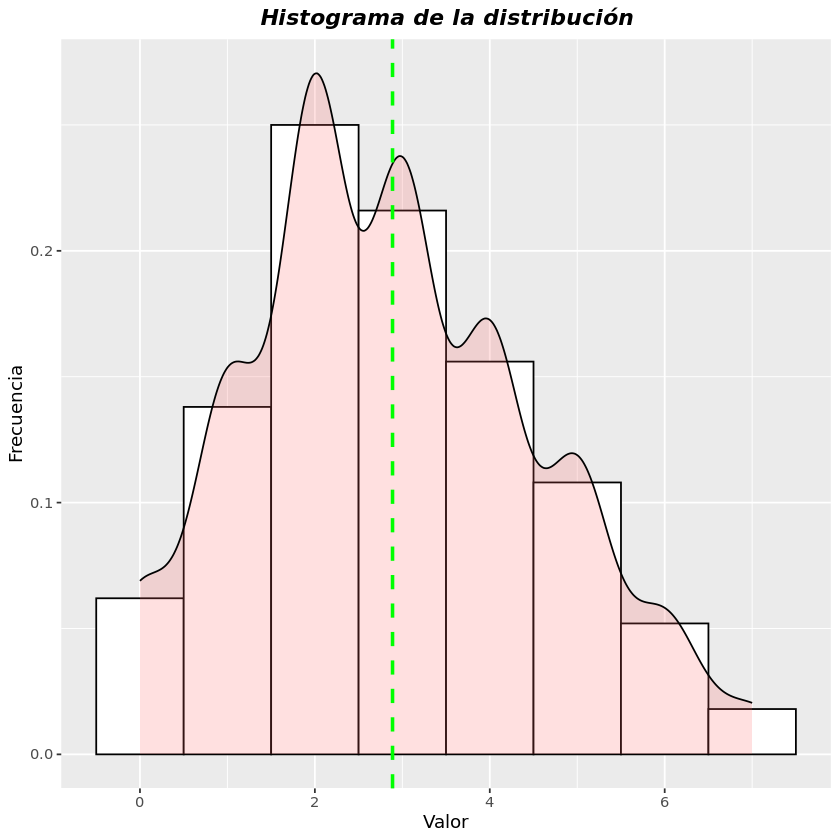

In [ ]:
p.real<-my.hist(datos.cola,"samples",binwidth=1,xmin=-0.5,xmax=7.5)
p.real

___
**Q: ¿A qué tipo de distribución se parece?**

**R:** La distribución que sigue el histograma se parece claramente a una distribución de **Poisson**. Esto lo podemos deducir pues la gráfica sigue una distribución altamente parecida al histograma de la pregunta 4, en donde sabíamos de antemano que los datos graficados seguían una distribución de Poisson.

**Q: Proponga un _modelo paramétrico_ que permita explicar esta distribución de datos.**

**R:** Para proponer un modelo paramétrico, tenemos que definir el espacio de datos $X$, el espacio de parámetros $\Theta$ y la familia de distribuciones $\mathcal{P}$. Vamos por partes:

Como los datos son todos números naturales, entonces podemos definir el espacio de datos como $X=\mathbb{N}$. Luego, tenemos que como queremos estimar el parámetro que se ajuste a los datos reales, los cuales siguen una distribución de Poisson, entonces podemos definir el espacio de parámetros como $\Theta=\{\nu\in\mathbb{R}_+\}$. Finalmente, como la distribución es de Poisson, entonces podemos definir la familia de distribuciones como $\mathcal{P}=\{\mathrm{Poisson}(\nu):\nu\in\Theta\}$. En síntesis, nuestro modelo paramétrico es:

$$X=\mathbb{N}, \text{ } \Theta=\{\nu\in\mathbb{R}_+\}, \text{ } \mathcal{P}=\{\mathrm{Poisson}(\nu):\nu\in\Theta\}$$
___


**11.-** _Estime_ el parámetro que ajuste de mejor manera este modelo paramétrico a nuestros datos _reales_. Grafique la función de densidad asociada a ese parámetro sobre el histograma que acaba de definir. ¿Es visualmente razonable el ajuste? ¿Lo consideraría un modelo _razonable_ para el fenómeno estudiado?

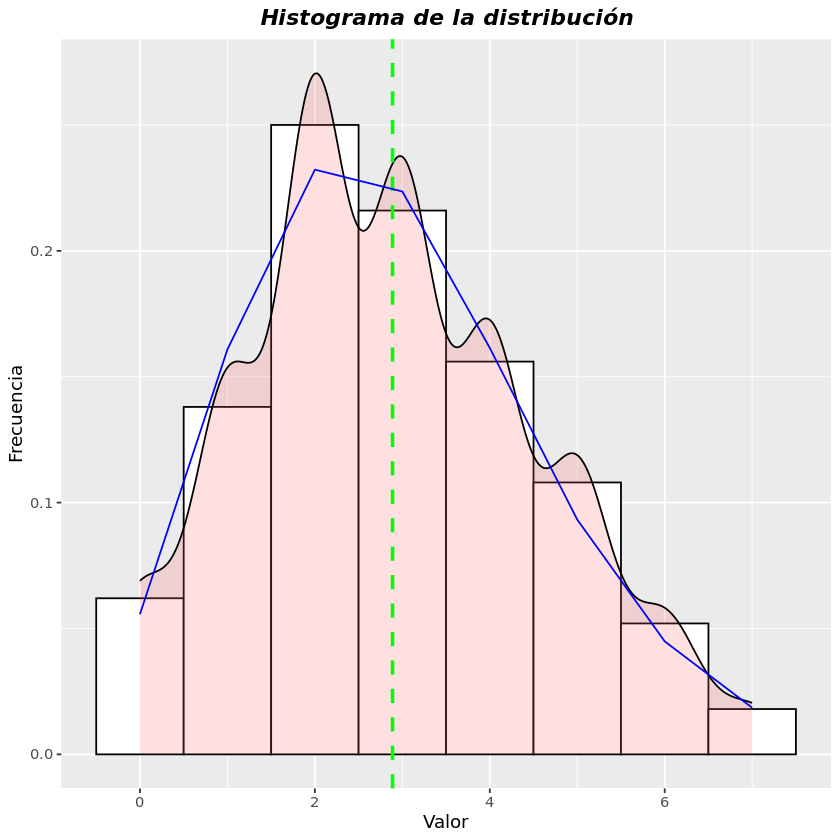

In [ ]:
# Definimos el estimador media empírica
mediae<-numeric(length=500)
mediae<-sum(datos.cola$samples)/500

# Graficamos la función de densidad asociada a este parámetro sobre el histograma
p.real + stat_function(fun=dpois, n=8,xlim=c(0,7), args=list(mediae),color="blue")

___
**Q: ¿Es visualmente razonable el ajuste? ¿Lo consideraría un modelo razonable para el fenómeno estudiado?**

**R:** A nuestro parecer, el ajuste es lo bastante parecido para considerarse como visulamente razonable. Si bien es cierto que la función de densidad asociada al parámetro estimado no pasa exactamente por la función de densidad graficada en rojo de los datos originales, esto puede deberse en parte a que la función de densidad en azul toma solo valores discretos, mientras que la graficada en rojo parece ser una aproximación a lo que sería algo continuo. Dicho esto, de todas maneras la función de densidad asociada al parámetro estimado se asemeja bastante en la _forma_ de la distribución de los datos, y a pesar de tener errores, estos pueden ser considerados casi indespreciables por lo chicos que son. Se puede ver como el error asociado por ejemplo al primer intervalo es de menos que $0.01$, mientras que el error asociado al último intervalo es básicamente despreciable (incluso pareciera ser exactamente igual). En el tercer intervalo se puede observar un error mayor, de aproximadamente $0.02$, pero sigue siendo algo que no vale mucho la pena tomar en cuenta.

En síntesis, a nuestro juicio el ajuste **si es** visualmente aceptable, pues los errores son minúsculos, y el modelo que se propuso si se considera como razonable para el fenómeno estudiado, pues se pudo asemejar la curva de los datos con un estimador obtenido del modelo propuesto.
___ 

**11.5.-** ¿Es capaz de identificar precisamente cuál es la _tasa de llegada de las llamadas_ ($\lambda$)?

___
**R:** No, no es posible identificar precisamente el valor de $\lambda$, pues el estimador usado solo nos permite identificar (aproximadamente) el valor de $\nu$, el cual es el cociente entre la tasa de llegada de llamadas $\lambda$ y la velocidad con la que la IA es capaz de resolver estas, $\mu$. En otras palabras, el haber estimado que $\nu\approx2.888$ quiere decir que la tasa de llegada de llamadas $\lambda$ es $2.888$ veces mayor que $\mu$, sin embargo, esto al ser una relación no nos permite conocer $\lambda$ exactamente, pues, por ejemplo, la velocidad con la que la IA es capaz de resolver las llamadas podría ser $1$, y por ende $\lambda=2.888$, o también $\mu$ podría ser 10, y la tasa de llegada de las llamadas sería $\lambda=28.88$. Es decir, hay toda una serie de resultados posibles para $\lambda$, pero no somos capaces de determinar cuál de estos valores es en realidad.
___ 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a05167b5-a5ea-492f-b37a-264b99f6ae3e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>